In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
from scipy.optimize import fsolve

In [3]:
fe_rri = pd.read_csv("../data/df_ferri.csv")
E_PA = fe_rri.E_pa_ferri
I_PA = fe_rri.I_pa_ferri
E_PC = fe_rri.E_pc_ferri
I_PC = fe_rri.I_pc_ferri
E_12 = fe_rri.E_12_ferri
E_PA_12 = fe_rri.E_pa_1_2_ferri
E_PC_12 = fe_rri.E_pc_1_2_ferri
fe_rri

,E_pa_ferri,I_pa_ferri,E_pc_ferri,I_pc_ferri,E_12_ferri,E_pa_1_2_ferri,E_pc_1_2_ferri
0,0.356293,0.000234,0.231781,-0.000229,0.294037,0.278344,0.309085
1,0.367737,0.000298,0.216370,-0.000316,0.292053,0.282527,0.302505
2,0.384369,0.000434,0.203705,-0.000460,0.294037,0.290358,0.294877
3,0.393524,0.000518,0.190887,-0.000539,0.292206,0.288930,0.288537
4,0.401611,0.000561,0.186768,-0.000629,0.294189,0.296646,0.286447
5,0.413818,0.000650,0.177002,-0.000754,0.295410,0.300802,0.280716
6,0.421448,0.000728,0.169983,-0.000855,0.295715,0.306626,0.276399
7,0.430908,0.000783,0.155029,-0.000941,0.292969,0.309976,0.272338
8,0.441742,0.000839,0.151215,-0.001011,0.296478,0.312458,0.266397


In [4]:
archivos = glob.glob("../data/CV_ferri/*")
def importa(archivo):
    ferri = pd.read_csv(archivo, index_col = 0, usecols = [0,2,5])
    return ferri
dataframes = []
for i in archivos:
    dataframes.append(importa(i))
for i in dataframes:    
    i.rename(columns ={"WE(1).Current (A)":"I_A","Index":"id"}, inplace = True)


In [11]:
velocidades = [10,20,50,75,100,150,200,250,300]
dataframes[0]

,I_A,id
Potential applied (V),,
0.431976,-5.624390e-07,1
0.429535,-1.036072e-06,2
0.427094,-1.482849e-06,3
0.424652,-1.916199e-06,4
0.422211,-2.368164e-06,5
...,...,...
0.444183,-1.766968e-06,980
0.441742,-1.942139e-06,981
0.439301,-2.126465e-06,982


In [6]:
#f = "../data/CV_ferri/1_10.csv"
#ferri_10 = pd.read_csv(f, usecols = [0,2,5])
#ferri_10.rename(columns ={"WE(1).Current (A)":"I_A","Index":"id",
#"Potential applied (V)":"E_V"}, inplace = True)
#
#x_a = np.array(ferri_10.E_V[(ferri_10.id > 800)&(ferri_10.id < 950)])
#y_a = np.array(ferri_10.I_A[(ferri_10.id > 800)&(ferri_10.id < 950)])
#A_a = np.vstack([x_a, np.ones(len(x_a))]).T
#m_a, c_a = np.linalg.lstsq(A_a, y_a, rcond=None)[0]
##
#x_c = np.array(ferri_10.E_V[(ferri_10.id > 350)&(ferri_10.id < 466)])
#y_c = np.array(ferri_10.I_A[(ferri_10.id > 350)&(ferri_10.id < 466)])
#A_c = np.vstack([x_c, np.ones(len(x_c))]).T
#m_c, c_c = np.linalg.lstsq(A_c, y_c, rcond=None)[0]
#
##d es para pico anódico y e es para pico catódico
#x_d = np.array(ferri_10.E_V[(ferri_10.id > 535)&(ferri_10.id < 635)])
#y_d = np.array(ferri_10.I_A[(ferri_10.id > 535)&(ferri_10.id < 635)])
#coef_d = np.polyfit(x_d,y_d, deg=7)
#xseq_d = np.linspace(ferri_10.E_V.loc[(ferri_10.id == 535)], ferri_10.E_V.loc[(ferri_10.id == 635)], num=100)
#
#
#x_e = np.array(ferri_10.E_V[(ferri_10.id > 50)&(ferri_10.id < 150)])
#y_e = np.array(ferri_10.I_A[(ferri_10.id > 50)&(ferri_10.id < 150)])
#coef_e = np.polyfit(x_e,y_e, deg=7)
#xseq_e = np.linspace(ferri_10.E_V.loc[(ferri_10.id == 50)], ferri_10.E_V.loc[(ferri_10.id == 150)], num=100)
#
#
#
##
#I_pa = ferri_10.I_A.max()
#I_pc = ferri_10.I_A.min()
#E_pc = pd.to_numeric(ferri_10.E_V[ferri_10.I_A == I_pc])
#E_pa = ferri_10.E_V[ferri_10.I_A == I_pa]
#E_1_2 = ((E_pa + E_pc)/2).astype("float")
#I_pa_1_2 = (ferri_10.I_A.max() - (m_a*E_pa +c_a))/2
#I_pc_1_2 = (ferri_10.I_A.max() - (m_c*E_pc +c_c))/2
#
#I_paaa = I_pa - m_a*E_pa + c_a
#I_pccc = I_pc - m_c*E_pc + c_c
#
#
##E_pc_1_2 = 
#
##
#w_a = np.array(ferri_10.E_V[(ferri_10.id > 520)&(ferri_10.id < 790)])
#w_c = np.array(ferri_10.E_V[(ferri_10.id > 40)&(ferri_10.id < 300)]) 
##
#fig, ax = plt.subplots(figsize = (12,6))
#
#ax.scatter(ferri_10.E_V,ferri_10.I_A, s = 2)
#ax.plot(w_a, m_a*w_a + c_a, 'r', label='Fitted line')
#ax.plot(w_c, m_c*w_c + c_c, 'r', label='Fitted line')
#
#ax.plot(xseq_d,coef_d[0]*xseq_d**6 +coef_d[1]*xseq_d**5 +coef_d[2]*xseq_d**4 + coef_d[3]*xseq_d**3 + coef_d[4]*xseq_d**2 +coef_d[5]*xseq_d + coef_d[6] , "g.")
#ax.plot(xseq_e,coef_e[0]*xseq_e**6 +coef_e[1]*xseq_e**5+ coef_e[2]*xseq_e**4 + coef_e[3]*xseq_e**3 + coef_e[4]*xseq_e**2 +coef_e[5]*xseq_e + coef_e[6], "g.")
#
#
#ax.vlines(x = E_pc, ymin = -0.002, ymax = m_c*E_pc + c_c,
#               colors = 'red')
#ax.vlines(x = E_pa, ymin = -0.002, ymax = I_pa,
#           colors = 'red')
#ax.set_ylim((I_pc + 0.1*I_pc,I_pa + 0.1*I_pa))
#ax.text(-0.3,I_pa,f"I_pa = {I_pa}")
#ax.text(-0.3,I_pa*(1-0.2),f"E_pa = {E_pa}")
#ax.text(-0.3,I_pa,f"I_pa = {I_pa}")
##ax.set_ylim((I_pc + 0.1*I_pc,0))
##ax.set_xlim(0.43,0.44)
#
#print(I_pc)

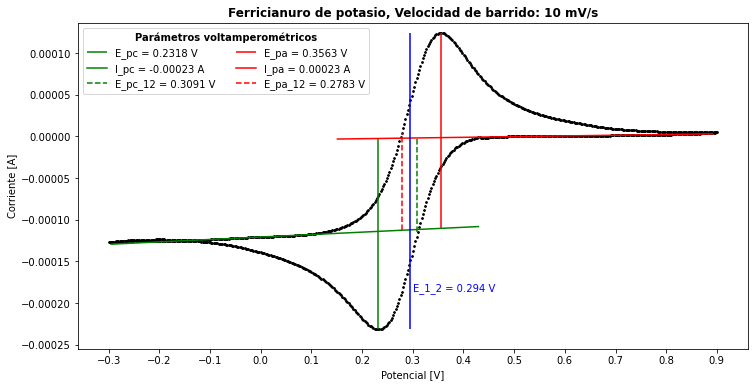

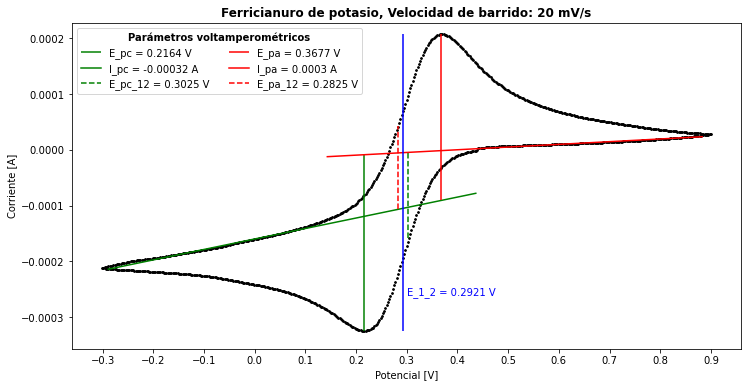

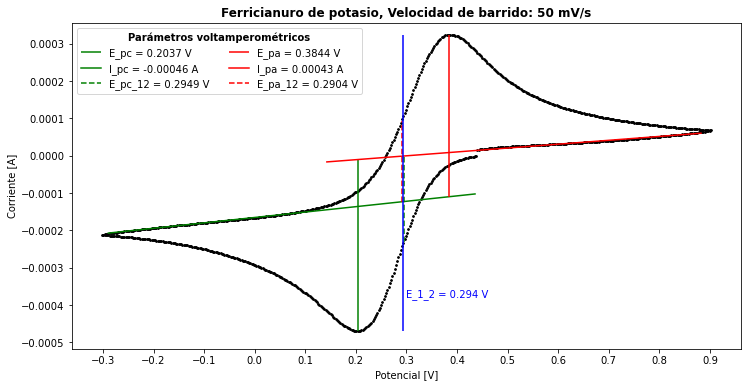

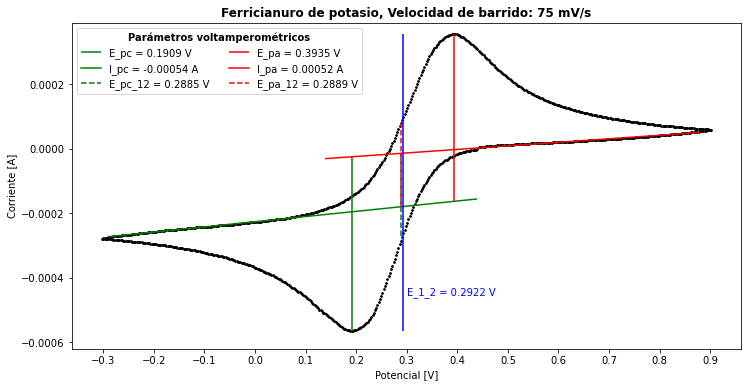

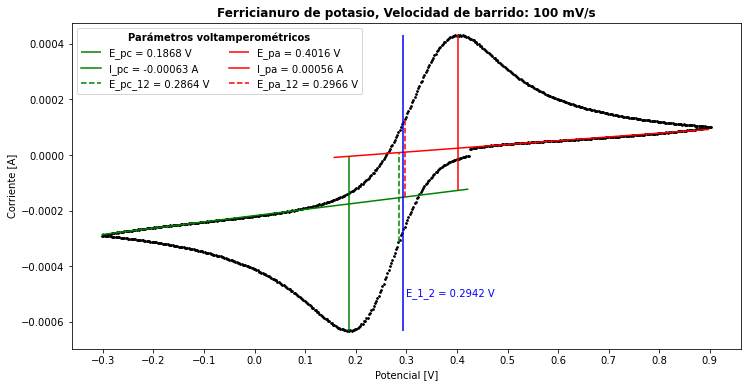

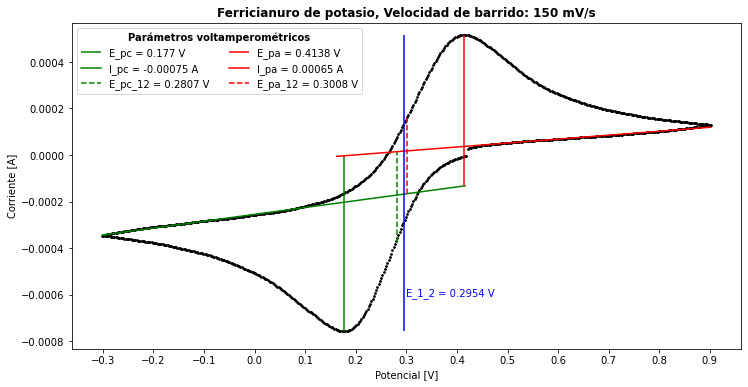

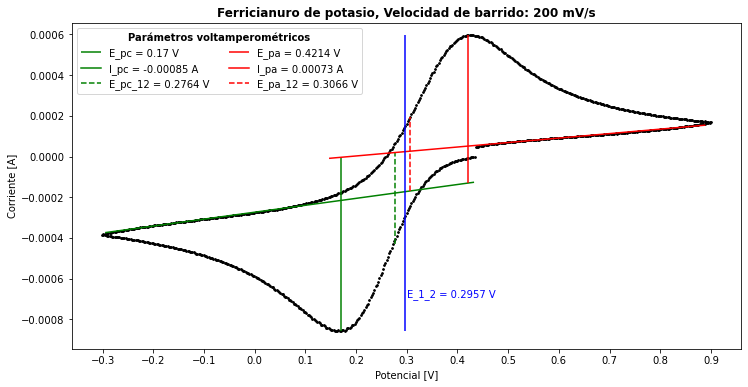

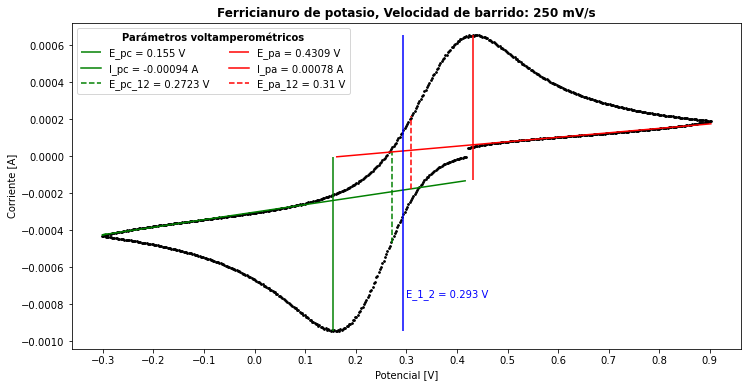

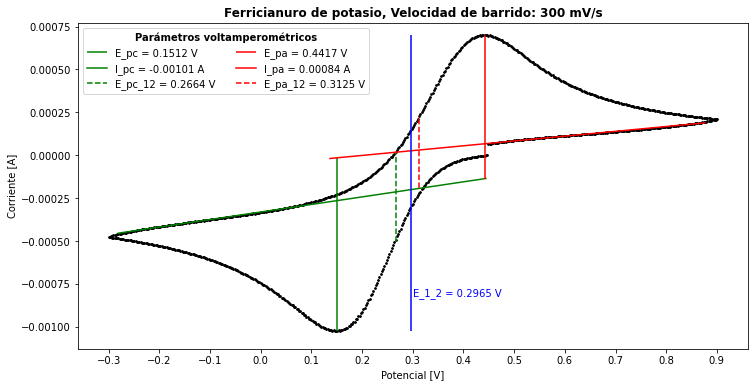

In [8]:
EE_PPAA = []
n = 0
for ferri in dataframes:
    
    x_c = np.array(ferri.index[(ferri.id > 800)&(ferri.id < 950)])
    y_c = np.array(ferri.I_A[(ferri.id > 800)&(ferri.id < 950)])
    A_c = np.vstack([x_c, np.ones(len(x_c))]).T
    m_c, c_c = np.linalg.lstsq(A_c, y_c, rcond=None)[0]
    x_a = np.array(ferri.index[(ferri.id > 350)&(ferri.id < 466)])
    y_a = np.array(ferri.I_A[(ferri.id > 350)&(ferri.id < 466)])
    A_a = np.vstack([x_a, np.ones(len(x_a))]).T
    m_a, c_a = np.linalg.lstsq(A_a, y_a, rcond=None)[0]
    
    I_pa_ = ferri.I_A.max()
    I_pc_ = ferri.I_A.min()
    
    E_pc = ferri.index[ferri.I_A == I_pc_].astype("float")
    E_pa = ferri.index[ferri.I_A == I_pa_].astype("float")
    E_1_2 = ((E_pa + E_pc)/2).astype("float")
    I_pa = I_pa_ - (m_a*E_pa + c_a)
    I_pc = I_pc_ - (m_c*E_pc + c_c)
    I_pa_12_r = I_pa/2
    I_pc_12_r = I_pc/2
    
    
   
    #d es para pico anódico y e es para pico catódico
    x_d = np.array(ferri.index[(ferri.id > 525)&(ferri.id < 605)])
    y_d = np.array(ferri.I_A[(ferri.id > 525)&(ferri.id < 605)]) - (m_a*x_d + c_a)
    coef_d = np.polyfit(x_d,y_d, deg=7)
    xseq_d = np.linspace(ferri.index[(ferri.id == 525)], ferri.index[(ferri.id == 605)], num=100)
    
    
    x_e = np.array(ferri.index[(ferri.id > 40)&(ferri.id < 110)])
    y_e = np.array(ferri.I_A[(ferri.id > 40)&(ferri.id < 110)]) - (m_c*x_e + c_c)
    coef_e = np.polyfit(x_e,y_e, deg=7)
    xseq_e = np.linspace(ferri.index[(ferri.id == 40)], ferri.index[(ferri.id == 110)], num=100)
         
    I_pa_1_2 = I_pa_12_r + (m_a*E_pa +c_a)
    I_pc_1_2 = I_pc_12_r + (m_c*E_pc +c_c)    
    f = lambda x: coef_d[0]*x**7 +coef_d[1]*x**6 +coef_d[2]*x**5 + coef_d[3]*x**4 + coef_d[4]*x**3 +coef_d[5]*x**2 + coef_d[6]*x + (coef_d[7] -I_pa_12_r)
    E_pa_1_2 = fsolve(f,x0 =0.3)
    g = lambda x: coef_e[0]*x**7 +coef_e[1]*x**6 +coef_e[2]*x**5 + coef_e[3]*x**4 + coef_e[4]*x**3 +coef_e[5]*x**2 + coef_e[6]*x + (coef_e[7] -I_pc_12_r)
    E_pc_1_2 = fsolve(g,x0 =0.3)
    
    
    
    w_a = np.array(ferri.index[(ferri.id > 1)&(ferri.id < 300)])
    w_c = np.array(ferri.index[(ferri.id > 485)&(ferri.id < 790)]) 
    
    
    #GRÁFICA
    fig, ax = plt.subplots(figsize = (12,6))
    
    ax.scatter(ferri.index,ferri.I_A,s = 3, c = "k")
    
    ax.vlines(x = E_pc, ymin = I_pc_, ymax = m_c*E_pc + c_c, colors = 'g', label = f"E_pc = {round(E_PC[n],4)} V")
    ax.plot(w_a, m_a*w_a + c_a, 'g', label = f"I_pc = {round(I_PC[n],5)} A")
    ax.vlines(x = E_pc_1_2, ymin = I_pc_12_r, ymax = m_c*E_pc_1_2 + c_c, colors = 'g', linestyles= "dashed", label = f"E_pc_12 = {round(E_PC_12[n],4)} V")
    
    ax.vlines(x = E_pa, ymin = m_a*E_pa + c_a, ymax = I_pa_, colors = 'r', label = f"E_pa = {round(E_PA[n],4)} V")
    ax.plot(w_c, m_c*w_c + c_c, 'r', label = f"I_pa = {round(I_PA[n],5)} A")
    ax.vlines(x = E_pa_1_2, ymin = m_a*E_pa_1_2 + c_a, ymax = m_a*E_pa_1_2 + c_a + I_pa_12_r,colors = 'r', linestyles= "dashed", label = f"E_pa_12 = {round(E_PA_12[n],4)} V")
    
    ax.vlines(x = E_1_2, ymin = I_pc_, ymax = I_pa_, colors="b")
    ax.text(0.3,I_pc_*0.8,f"E_1_2 = {round(E_12[n],4)} V",c = "b")
    
    
    ax.set_ylim((I_pc_ + 0.1*I_pc_,I_pa_ + 0.1*I_pa_))
    ax.set_xticks(np.arange(-0.3,1,0.1))
    ax.set_xlabel("Potencial [V]")
    ax.set_ylabel("Corriente [A]")
     
    leg = ax.legend(loc="upper left", bbox_to_anchor=[0, 1],ncol=2, title="Parámetros voltamperométricos", fancybox=True,)
    leg.get_title().set_color("k")
    leg.get_title().set_weight("bold")
 
    
    #
    #ax.hlines(y = 0, xmin = -0.3, xmax = 0.9, colors = 'b')
  #
    #ax.plot(x_d,coef_d[0]*x_d**7 +coef_d[1]*x_d**6 +coef_d[2]*x_d**5 + coef_d[3]*x_d**4 + coef_d[4]*x_d**3 +coef_d[5]*x_d**2 + coef_d[6]*x_d + coef_d[7] + (m_a*x_d + c_a), "g.")
    #ax.plot(x_e,coef_e[0]*x_e**7 +coef_e[1]*x_e**6+ coef_e[2]*x_e**5 + coef_e[3]*x_e**4 + coef_e[4]*x_e**3 +coef_e[5]*x_e**2 + coef_e[6]*x_e + coef_e[7] + (m_c*x_e + c_c), "g.")
#
    #ax.plot(x_d,y_d)
    #ax.plot(x_e,y_e)
    
    vel = velocidades[n]
    n = n+1
    
    plt.title(f"Ferricianuro de potasio, Velocidad de barrido: {vel} mV/s", weight = "bold")
    
    nom_arch = f"CV_ferri_{vel}"
    
    plt.savefig(rf"C:\Users\alvar\OneDrive - UNIVERSIDAD NACIONAL AUTÓNOMA DE MÉXICO\Documents\Electroquímica\PRACTICA 3\CV_ferri_{vel}.png")
    
    
    EE_PPAA.append(E_pa[0])
    


In [7]:
#ln_m = (2.823954435, 2.130807254, 1.725342146, 1.437660073, 1.214516522, 1.032194965, 0.878044285, 0.744512893)
#FEM = (0.496, 0.476, 0.464, 0.456, 0.45, 0.444, 0.439, 0.435)
#LN_M = np.asarray(ln_m)
#fem = np.asarray(FEM)

In [8]:
#fig, ax = plt.subplots(figsize = (5, 5))
#
#ax.scatter(LN_M,fem)
#b, a = np.polyfit(LN_M,fem, deg=1)
#xseq = np.linspace(0, 3, num=100)
#ax.plot(xseq, a + b * xseq, color="r", lw=1)
#ax.set_title("Determinación potenciométrica de E'")
#ax.set_xlim(0.5,3)
#ax.set_ylim(0.43,0.5)
#ax.set_xlabel("E [V]")
#ax.set_ylabel("ln([Fe(CN)$_6]^{3-}$/[Fe(CN)$_6]^{4-}$)")
#ax.text(0.6,0.495,f"Regresión lineal: b = {round(b,5)}, a = {round(a,5)} ",
#        color='r', fontsize=10)
#
#plt.savefig(r"C:\Users\alvar\OneDrive - UNIVERSIDAD NACIONAL AUTÓNOMA DE MÉXICO\Documents\Electroquímica\PRACTICA 3\reg_lin.png")

In [11]:
EE_PPAA

[0.35629272460938,
 0.36773681640625,
 0.38436889648438,
 0.39352416992188,
 0.401611328125,
 0.413818359375,
 0.42144775390625,
 0.430908203125,
 0.44174194335938]